# Magnitude of Surgical Site Infections (SSIs) and Associated Factors among Post-Operative Patients at Myungsung Christian Medical Centre

_By Husna Fazal Ahmed_

### Introduction
Surgical Site Infections (SSIs) are a significant cause of postoperative complications, especially in resource-limited countries. This project aims to predict the likelihood of SSIs using machine learning models and associated factors such as age, comorbidities, and surgery type.


In [18]:
pip install seaborn

1. Import Necessary Libraries

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import joblib  # Import joblib for saving/loading models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import seaborn as sns




2. Load and Preprocess the Dataset

In [2]:
# Load the dataset
ssi_data = pd.read_csv('/content/data/SSI Data 2.csv')

# Display the first few rows of the dataset
print(ssi_data.head())

# Identify columns that are of object type (string columns)
object_columns = ssi_data.select_dtypes(include=['object']).columns

# One-hot encode the object columns
for col in object_columns:
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(ssi_data[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    ssi_data = ssi_data.drop(col, axis=1).reset_index(drop=True)
    ssi_data = pd.concat([ssi_data, encoded_df], axis=1)

# Replace non-numeric values with NaN and fill with 0
ssi_data = ssi_data.replace(' ', np.nan).fillna(0)

# Define features (X) and target (y)
X = ssi_data.drop('SSI', axis=1)  # Replace 'SSI' with the actual target column name
y = ssi_data['SSI']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


       ID  Sex   Age               Dx Lab    Hg      WBC     Plt  comorbidity  \
0  411773    1  58.0  Inguinal hernia      18.2   4200.0   40000            2   
1  437928    2  34.0   Cholelithiasis      13.8   6000.0  250000            2   
2  442161    1  50.0   Cholelithiasis      16.2   9000.0  241000            1   
3  441665    1  57.0   Cholelithiasis      13.0  10800.0  188000            2   
4  419968    1  76.0   Cholelithiasis      13.5  10900.0  154000            1   

   HTN  ...  typee  dosee  surgerytype specific  Duration  hospitalstay  ICU  \
0    2  ...                          1       47         2             3    2   
1    2  ...                          1        2         1             3    2   
2    1  ...                          1        2         2             5    2   
3    2  ...                          1        2         2             4    2   
4    1  ...                          1        2         2             2    2   

  transfusion approach SSI  
0  

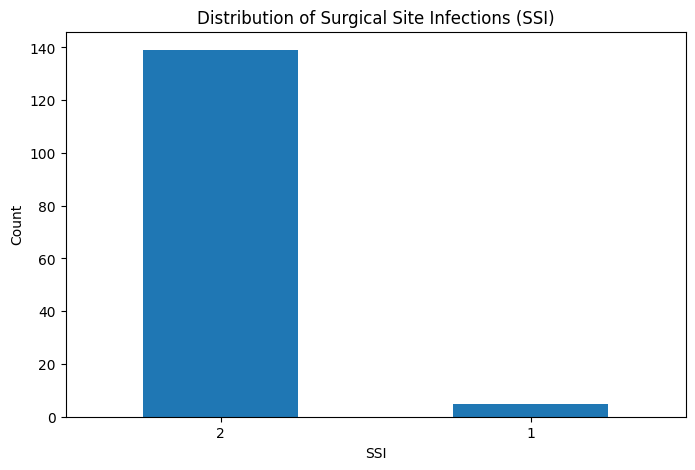

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
y.value_counts().plot(kind='bar')
plt.title('Distribution of Surgical Site Infections (SSI)')
plt.xlabel('SSI')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Visualize feature correlations
plt.figure(figsize=(12, 10))
correlation_matrix = ssi_data.corr()
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


3. Define and Train the Simple Neural Network Model

In [6]:
# Define the Simple Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model using Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.0000e+00 - loss: 41628.5742 - val_accuracy: 0.0435 - val_loss: 19291.7441
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 9290.8936 - val_accuracy: 0.0435 - val_loss: -6914.8711
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0280 - loss: -12282.8262 - val_accuracy: 0.0435 - val_loss: -22917.9434
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0280 - loss: -27005.1562 - val_accuracy: 0.0435 - val_loss: -37794.8047
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0319 - loss: -41057.6328 - val_accuracy: 0.0435 - val_loss: -52414.8711
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0319 - loss: -55370.6641 - val_accuracy: 0.0435 - val_loss: -67012.2344
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0358 - loss: -69367.5312 - val_accuracy: 0.0435 - val_loss: -81756.1250
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - 

4. Evaluate the Model and prediction

In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")
# Make predictions
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary predictions

# Generate confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0345 - loss: -1180510.3750
Test Accuracy: 0.03448275849223137
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Confusion Matrix:
[[ 1  0]
 [28  0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.03      1.00      0.07         1
           2       0.00      0.00      0.00        28

    accuracy                           0.03        29
   macro avg       0.02      0.50      0.03        29
weighted avg       0.00      0.03      0.00        29



5. Plot Training and Validation Metrics

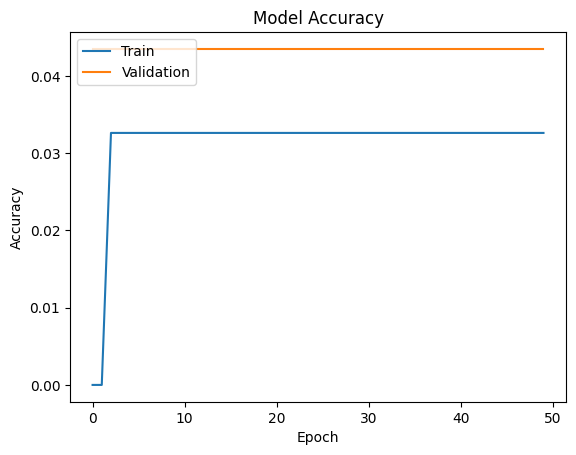

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


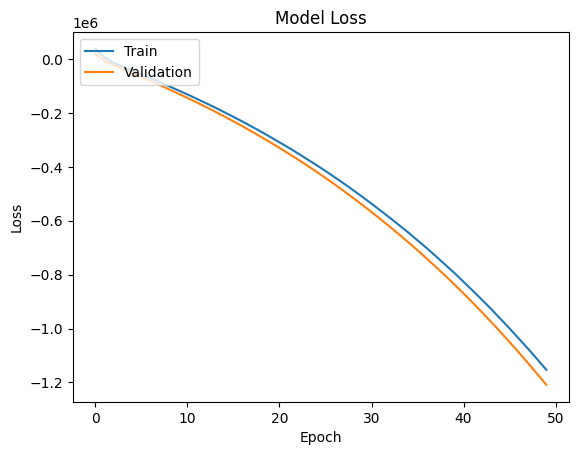

In [9]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


 6.Load Saved Models

In [10]:
!wget https://github.com/Husnafazal/alu-machine_learning/raw/main/SSI%20Project/saved_models/simple_nn_model.h5
!wget https://github.com/Husnafazal/alu-machine_learning/raw/main/SSI%20Project/saved_models/optimized_nn_model.h5

from tensorflow.keras.models import load_model

# Load the models
loaded_simple_model = load_model('simple_nn_model.h5')
loaded_optimized_model = load_model('optimized_nn_model.h5')

print("Models loaded successfully")

# Compile the models to ensure metrics are built
loaded_simple_model.compile(optimizer=Adam(learning_rate=0.001),
                             loss='binary_crossentropy',
                             metrics=['accuracy'])
loaded_optimized_model.compile(optimizer=Adam(learning_rate=0.001),
                                loss='binary_crossentropy',
                                metrics=['accuracy'])



--2024-10-09 10:26:02--  https://github.com/Husnafazal/alu-machine_learning/raw/main/SSI%20Project/saved_models/simple_nn_model.h5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Husnafazal/alu-machine_learning/main/SSI%20Project/saved_models/simple_nn_model.h5 [following]
--2024-10-09 10:26:02--  https://raw.githubusercontent.com/Husnafazal/alu-machine_learning/main/SSI%20Project/saved_models/simple_nn_model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174048 (170K) [application/octet-stream]
Saving to: ‘simple_nn_model.h5’

simple_nn_model.h5  100%[===================>] 169.97K  --.-KB/s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Models loaded successfully


7. Evaluate Loaded Models

In [ ]:
# Evaluate the loaded models on the test data
simple_model_accuracy = loaded_simple_model.evaluate(X_test, y_test, verbose=0)
optimized_model_accuracy = loaded_optimized_model.evaluate(X_test, y_test, verbose=0)

# Print the accuracy of the loaded models
print(f"Loaded Simple Model Accuracy: {simple_model_accuracy[1]}")
print(f"Loaded Optimized Model Accuracy: {optimized_model_accuracy[1]}")


8. Hyperparameter Tuning with GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the model
logreg = LogisticRegression(max_iter=1000)

# Feature selection using RFECV (Recursive Feature Elimination with Cross-Validation)
selector = RFECV(estimator=logreg, step=1, cv=5)

# Hyperparameters to tune
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2'],
}

# Note: 'logreg__' prefix in param_grid is because of the named step in the pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('feature_selection', selector),
    ('logreg', logreg)
])

# GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Best parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2'}
Best CV score: 0.9652173913043478


Predict on the Testing Set

In [15]:
# Predict on the testing set
y_pred = grid_search.predict(X_test)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


Accuracy: 0.9655172413793104
Confusion Matrix:
[[ 0  1]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.97      1.00      0.98        28

    accuracy                           0.97        29
   macro avg       0.48      0.50      0.49        29
weighted avg       0.93      0.97      0.95        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
pip list


Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.8
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.9.30.0.32.59
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread         